In [1]:
%matplotlib inline
import sys, os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

## constants

In [2]:
m = 1.0
k = 1.0
q0 = 0.0
v0 = 1.0
p0 = m * v0
dt = 0.0005

In [3]:
def kinetic(p):
    return 0.5 * p * p / m

def potential(q):
    return 0.5 * k * (q - q0) * (q - q0)

In [4]:
def hamiltonian(q, p):
    return kinetic(p) + potential(q)

In [5]:
def force(q):
    return -1.0 * k * (q - q0)

In [6]:
energies = []

### normal integrate by v-Verlet

In [7]:
total_step = 1000000

In [8]:
position = np.zeros(total_step)
momentum = np.zeros(total_step)
energy = np.zeros(total_step)

In [9]:
q = q0
p = p0
v = v0

In [10]:
for t in tqdm(range(total_step)):
    position[t] = q
    momentum[t] = p
    energy[t] = hamiltonian(q, p)
    
    f0 = force(q)
    q = q + v * dt + 0.5 * f0 * dt * dt
    f1 = force(q)
    v = v + 0.5 * (f0 + f1) * dt
    p = m * v

Widget Javascript not detected.  It may not be installed or enabled properly.


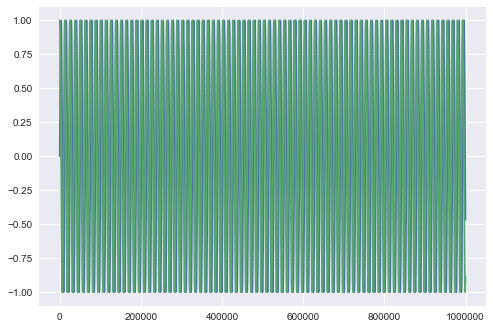

In [11]:
plt.plot(position)
plt.plot(momentum)

In [12]:
hamiltonian(q0, p0)

0.5

(0, 1)

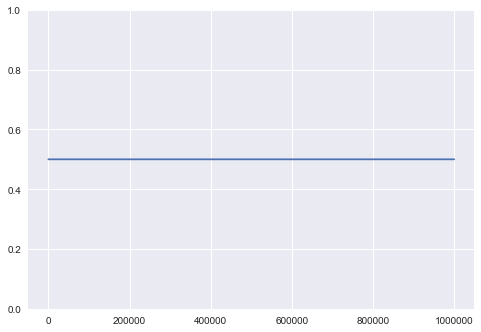

In [13]:
plt.plot(energy)
plt.ylim(0, 1)

In [14]:
energies.append(energy)

(-1.5, 1.5)

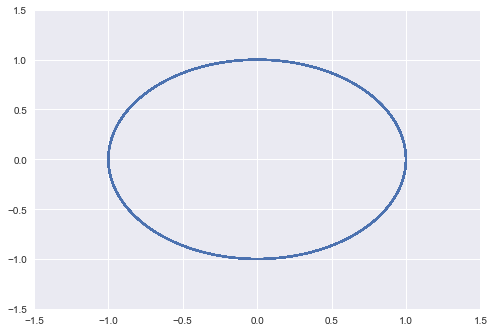

In [15]:
plt.plot(position, momentum)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

### integration by Euler

$m\frac{dp}{dt} = F$

$\frac{dp}{dt} = F/m$

$p(t+\Delta t) = p(t) + F \Delta t/m$

$p = \frac{dq}{dt}$

$q(t+\Delta t) = q(t) + p(t)\Delta t$

In [16]:
total_step = 1000000

In [17]:
position = np.zeros(total_step)
momentum = np.zeros(total_step)
energy = np.zeros(total_step)

q = q0
p = p0
v = v0

In [18]:
for t in tqdm(range(total_step)):
    position[t] = q
    momentum[t] = p
    energy[t] = hamiltonian(q, p)
    
    f0 = force(q)
    q = q + p * dt
    p = p + f0 * dt / m

Widget Javascript not detected.  It may not be installed or enabled properly.


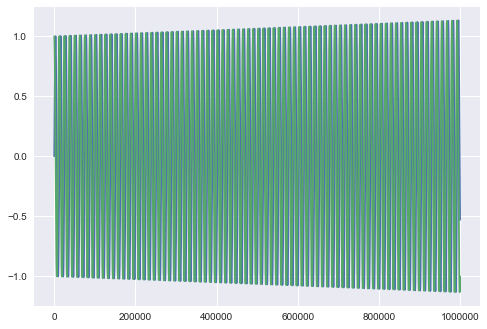

In [19]:
plt.plot(position)
plt.plot(momentum)

(0, 1)

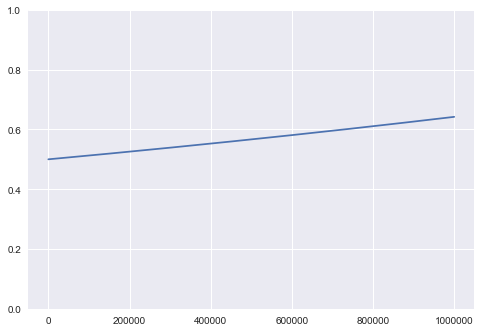

In [20]:
plt.plot(energy)
plt.ylim(0, 1)

In [21]:
energies.append(energy)

(-1.5, 1.5)

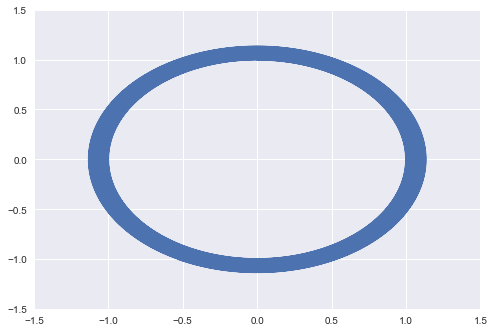

In [22]:
plt.plot(position, momentum)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

### integration by Runge-Kutta

$\frac{dp}{dt} = F(q)/m$

$p(t+\Delta t) = p(0) + \Delta t (k1 + k2 + k3 + k4) / 6 $

where,

$k1 = f(q0, t)$

$k2 = f(q0 + \Delta t k1 / 2, t + \Delta t / 2)$

$k3 = f(q0 + \Delta t k2/2, t + \Delta t / 2)$

$k4 = f(q0 + \Delta t k3, t + \Delta t$)

In [23]:
def runge_kutta(f, t, q, p, x0):
    k1 = f(t, q, p)
    k2 = f(t + dt/2, q + dt*k1/2, p + dt*k1/2)
    k3 = f(t + dt/2, q + dt*k2/2, p + dt*k2/2)
    k4 = f(t + dt, q + dt*k3, p + dt*k3)
    
    return x0 + dt * (k1 + k2 + k3 + k4) / 6.0

In [24]:
total_step = 1000000

position = np.zeros(total_step)
momentum = np.zeros(total_step)
energy = np.zeros(total_step)

q = q0
p = p0
v = v0

In [25]:
def f1(t, q, p):
    return force(q)

def f2(t, q, p):
    return p / m

In [26]:
for t in tqdm(range(total_step)):
    position[t] = q
    momentum[t] = p
    energy[t] = hamiltonian(q, p)
    
    p1 = runge_kutta(f1, t, q, p, x0=p)
    q1 = runge_kutta(f2, t, q, p, x0=q)
    
    p = p1
    q = q1

Widget Javascript not detected.  It may not be installed or enabled properly.


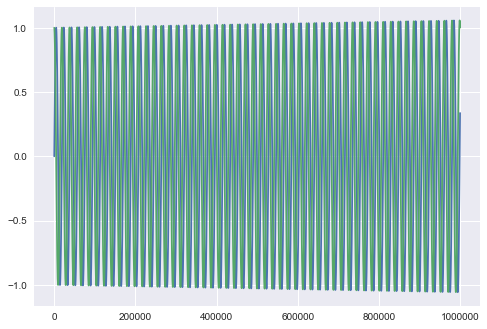

In [27]:
plt.plot(position)
plt.plot(momentum)

(0, 1)

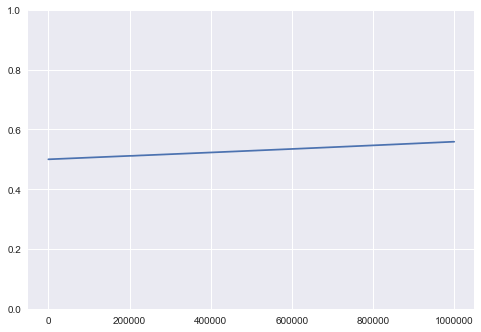

In [28]:
plt.plot(energy)
plt.ylim(0, 1)

In [29]:
energies.append(energy)

(-1.5, 1.5)

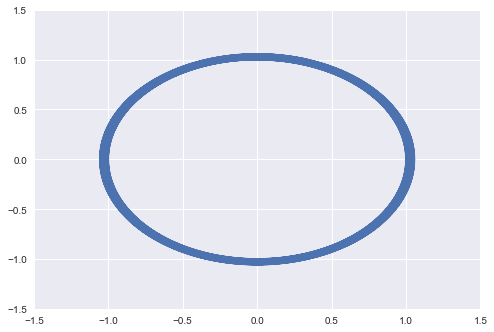

In [30]:
plt.plot(position, momentum)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## Compare

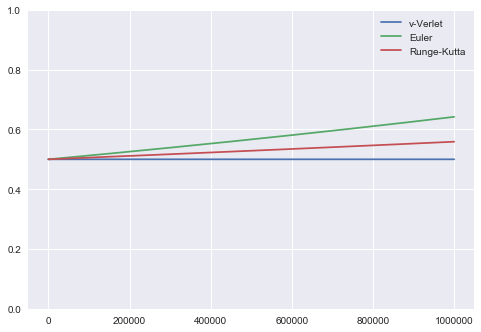

In [31]:
for lst in energies:
    plt.plot(lst)
plt.ylim(0, 1)
plt.legend(['v-Verlet', 'Euler', 'Runge-Kutta'])